# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [549]:
import numpy as np
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import requests

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import math

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [550]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [551]:
zipfile.extractall()

In [552]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [553]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [554]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [555]:
# write pandas code here
movie.info() #dataframe has no null-objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Q 2 (.25 point) Check datatype of columns

In [556]:
# write pandas code here

#it as checked in Q1 above but we can also run dtypes as well

movie.dtypes


movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [557]:
# write pandas code here
genre = movie.genres.str.split(pat = "|").sum()
unique_genere = pd.unique(genre)
unique_genere

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [558]:
# write pandas code here
for gen in unique_genere:
    movie[gen] = movie.genres.str.contains(gen, regex = False)
movie


,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9739,193585,Flint (2017),Drama,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [559]:
movie['year'] = movie.title.str.extract(pat = r'\((\d{4})\)$')
movie.sample(10)
#movie.info()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
7450,81512,Hereafter (2010),Drama|Fantasy,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,2010
5735,30793,Charlie and the Chocolate Factory (2005),Adventure|Children|Comedy|Fantasy|IMAX,True,False,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,2005
6590,55278,Sleuth (2007),Drama|Mystery|Thriller,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,2007
7614,86960,Across the Hall (2009),Thriller,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2009
8342,107999,Dragon ball Z 04: Lord Slug (1991),Animation|Children,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1991
4486,6629,House of Wax (1953),Crime|Horror|Mystery|Thriller,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1953
1825,2425,"General, The (1998)",Crime,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1998
6916,64278,"Pervert's Guide to Cinema, The (2006)",Documentary,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2006
5473,26198,"Yours, Mine and Ours (1968)",Children|Comedy,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1968
5603,26974,Gummo (1997),Drama,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1997


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?  per sync, use count.

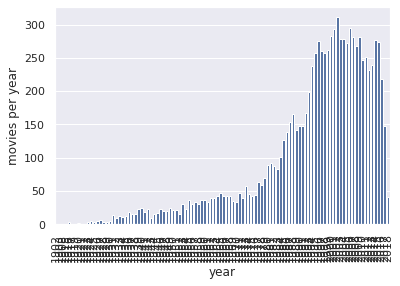

In [560]:

mv=movie['year'].value_counts().sort_values(ascending=True)
mv.sort_index(inplace=True)

sns.barplot(x= mv.index, y = mv, color="b")
sns.set(rc = {'figure.figsize':(30,10)})
plt.ylabel('movies per year')
plt.xlabel('year')
plt.xticks(rotation=90);

There appears to be a an exponential growth in movies through about 1997.  At this point, it appears that there was a consistant amount of movies that came out until 2015, where the number of movies per year started to decline.

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

In [561]:
#create a new df that has the number of genres per year

movie2 = movie.drop(['movieId'], axis = 1)
movie2 = movie2.groupby('year').sum()
movie2.head(10)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
year,,,,,,,,,,,,,,,,,,,,
1902,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1903,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1908,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1915,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1916,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1917,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1919,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1921,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


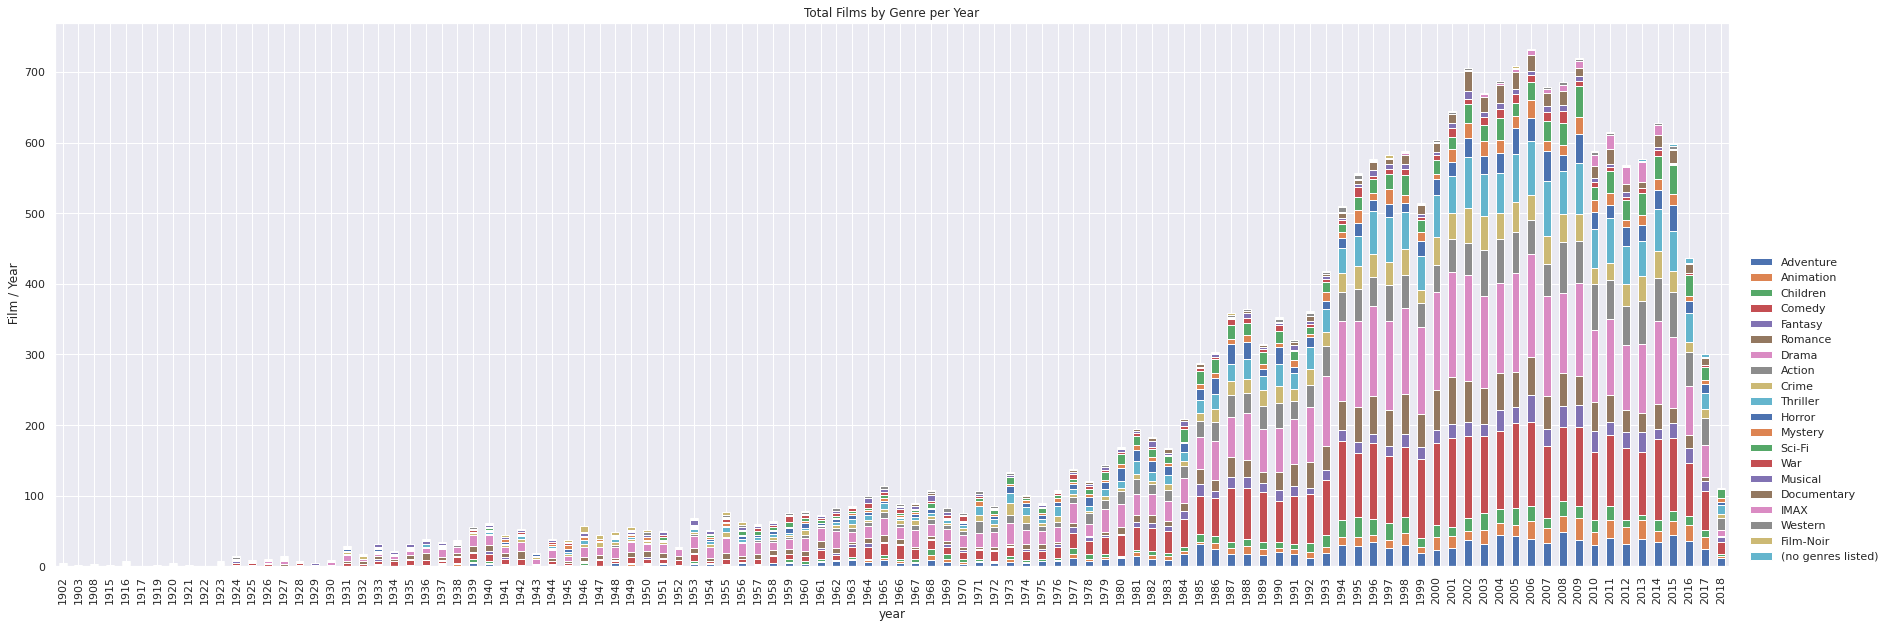

In [547]:

ax = movie2.plot.bar(stacked=True)
ax.legend(loc='lower left', bbox_to_anchor= (1.01, 0), ncol=1,
            borderaxespad=0, frameon=False)
ax.set_ylabel(" Film / Year")
ax.set_title("Total Films by Genre per Year")
plt.rcParams['figure.figsize'] = [30, 10];

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [562]:
movie['movie_title']= movie.title.str.extract(r'(.*)\((\d{4})\)')[0]
movie.drop(['title'], axis = 1, inplace=True)
movie

,movieId,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,1995,Toy Story
1,2,Adventure|Children|Fantasy,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1995,Jumanji
2,3,Comedy|Romance,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,1995,Waiting to Exhale
4,5,Comedy,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,False,True,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,2017,Black Butler: Book of the Atlantic
9738,193583,Animation|Comedy|Fantasy,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,2017,No Game No Life: Zero
9739,193585,Drama,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,2017,Flint
9740,193587,Action|Animation,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,2018,Bungo Stray Dogs: Dead Apple


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

This question was quite ambigous.  I seperate out the different genres on a per year basis and then calculated the average words in the movie title per year for each genre.  This data is shown in the count_df dataframe below.  Since the plot was quite complex, I only showed the data for the adventure over time to better show the data.  

In [563]:
#Make a copy of the dataframe for this question

movie3=movie.copy()
print(movie3.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9742 non-null   int64 
 1   genres              9742 non-null   object
 2   Adventure           9742 non-null   bool  
 3   Animation           9742 non-null   bool  
 4   Children            9742 non-null   bool  
 5   Comedy              9742 non-null   bool  
 6   Fantasy             9742 non-null   bool  
 7   Romance             9742 non-null   bool  
 8   Drama               9742 non-null   bool  
 9   Action              9742 non-null   bool  
 10  Crime               9742 non-null   bool  
 11  Thriller            9742 non-null   bool  
 12  Horror              9742 non-null   bool  
 13  Mystery             9742 non-null   bool  
 14  Sci-Fi              9742 non-null   bool  
 15  War                 9742 non-null   bool  
 16  Musical             9742

In [564]:
#Clean up the data.  
#Drop rows that do not have a year or a movie_title since both are needed to answer the question.  
#Remove the movieId column since it is not required.
#Change datatypes where required.

movie3 = movie3.dropna(how = 'any', subset = ['movie_title', 'year'])
movie3 = movie3.drop('movieId', axis=1)
movie3 = movie3.drop('genres', axis=1)
movie3['year']=pd.to_numeric(movie3['year'])

#create a new column that hat the word length for the title
movie3['title_count'] =movie3['movie_title'].str.split().str.len()


In [567]:
#Non-nulls are the same size and data types are correct

movie3.head(50)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,movie_title,title_count
0,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,1995,Toy Story,2
1,True,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,1995,Jumanji,1
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,1995,Grumpier Old Men,3
3,False,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,1995,Waiting to Exhale,3
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1995,Father of the Bride Part II,6
5,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,1995,Heat,1
6,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,1995,Sabrina,1
7,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1995,Tom and Huck,3
8,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,1995,Sudden Death,2
9,True,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,1995,GoldenEye,1


In [569]:
#just testing filter here
fltr = (movie3['year'] == 1902 ) & (movie3['Adventure'] == True)
fltr

0       False
1       False
2       False
3       False
4       False
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Length: 9718, dtype: bool

In [572]:
#applying the filter in the loc, just testing here 
movie3.loc[fltr, 'title_count'].mean()

10.0

In [593]:
#create new data frame

count_df= pd.DataFrame(columns = ['year'])

#Find the mix and max years

min_year = movie3['year'].min()
max_year = movie3['year'].max()

#add years to df 

for yr in range(min_year, max_year+1):
    count_df = count_df.append({'year': yr}, ignore_index = True)
    
#set the year to the index

count_df.set_index('year')

""
year
1902
1903
1904
1905
1906
...
2014
2015
2016


In [617]:
#iterate through the dataframe, filter out based upon year and genre to calculate average words in title per year. 
#placed the data in a new dataframe

for yr in range(min_year, max_year+1):
    for column_name, column_series in movie3.iloc[:, :-4].iteritems():
        fltr = (movie3['year'] == yr ) & (movie3[column_name] == True)
        mean_ct = movie3.loc[fltr, 'title_count'].mean()
        mean_ct=round(mean_ct, 2)
        count_df.at[yr-1902, column_name] = mean_ct
            

In [618]:
count_df = count_df.replace(np.nan, 0)
count_df['year']=pd.to_numeric(count_df['year'])
count_df.head(25)

,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
0,1902,10.0,0.0,0.0,0.0,10.0,0.0,0.00,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1903,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,1904,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1905,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1906,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1907,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1908,0.0,3.0,0.0,3.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1909,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1910,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1911,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


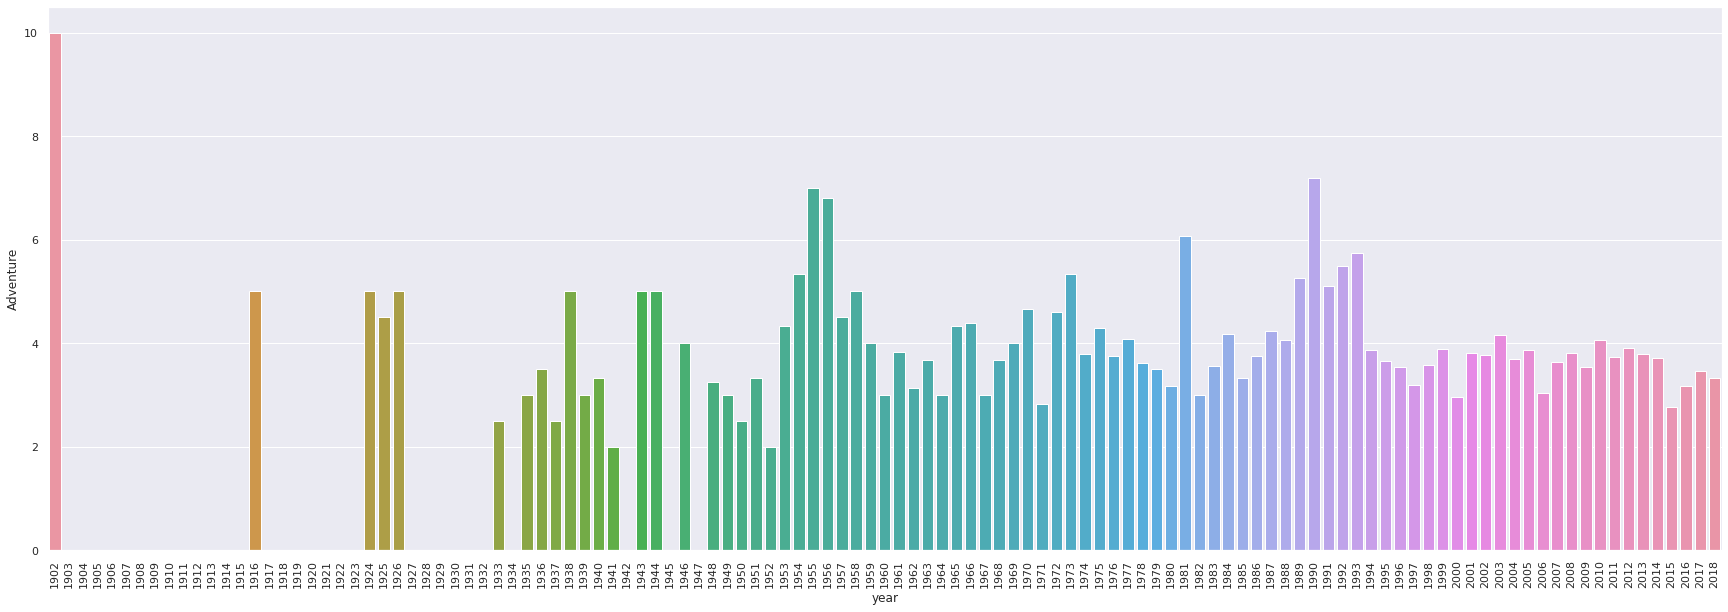

In [633]:
sns.barplot(x ='year', y = 'Adventure', data = count_df)
plt.xticks(rotation=90);
ax.set_title("Average Word Length of a Title by Genre per Year - Adventure")
plt.rcParams['figure.figsize'] = [30, 10];

The average word length of the title appears to stay around 3.75 to 4.0 word for the adventure genre. 